In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py 
import json
import copy
from collections import OrderedDict
from lmfit import Model
import os
from scipy import stats

from pygama.pargen.dsp_optimize import run_one_dsp
from pygama.pargen.dsp_optimize import run_grid
from pygama.pargen.dsp_optimize import ParGrid
from pygama.lgdo.lh5_store import LH5Store
import pygama.math.histogram as pgh
import pygama.math.peak_fitting as pgf
from pygama import __version__ as pygama_version
import pygama
import pygama.lgdo as lgdo
import pygama.lgdo.lh5_store as lh5


sys.path.insert(1, '../analysis/')
import processes.foundation as fd
import processes.fitModel as fM
import processes.histogramAction as hA

import scipy.signal as sig

In [40]:
run_list = [x for x in np.arange(1330,1360,1)]
df = fd.get_df_multiple(run_list, "Card1")

(1000.0, 10000.0)

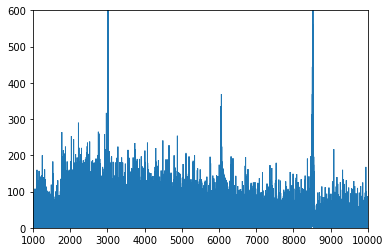

In [42]:
plt.hist(df["trapEmax"], histtype="step", bins=300000)
plt.ylim(0,600)
plt.xlim(1000,10000)

0.04280811709355686
-0.04784377473936274


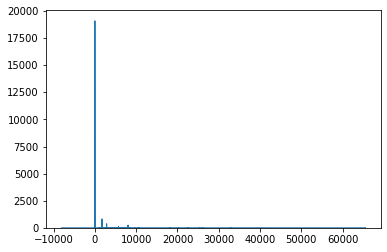

In [27]:
peaks = [[2200, 4000], [5000,7000], [7000,9000]]


energy = [121.78, 244.70, 344.28]

counts, bins, bars = plt.hist(df["trapEmax"], histtype='step', bins=160000)

adc=[]
for range in peaks:
        peak_range = hA.find_nearest_bin(bins, range[0]), hA.find_nearest_bin(bins, range[1])
        peak_idx = np.argmax(counts[peak_range[0]:peak_range[1]]) + peak_range[0]
        peak = bins[peak_idx]
        adc.append(peak)



slope, intercept, r_value, p_value, std_err = stats.linregress(adc,energy)


print(slope)
print(intercept)

In [4]:
m = 0.04280811709355686
c = -0.04784377473936274
energy = [m*x+c for x in df["trapEmax"]]

(760.0, 800.0)

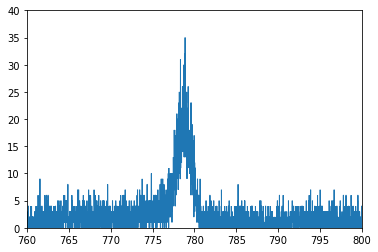

In [36]:
plt.hist(energy, histtype="step", bins=300000)
plt.ylim(00, 40)
plt.xlim(760,800)

778.8898451092175
[[Model]]
    Model(gePhotoPeak)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 323
    # data points      = 3801
    # variables        = 7
    chi-square         = 12102.8811
    reduced chi-square = 3.19000557
    Akaike info crit   = 4416.23969
    Bayesian info crit = 4459.94083
[[Variables]]
    A:      17.8786208 +/- 0.19352904 (1.08%) (init = 60)
    mu:     778.775017 +/- 0.01055621 (0.00%) (init = 778.8898)
    B:      1.96787400 +/- 0.09269667 (4.71%) (init = 1)
    C:     -1.62197607 +/- 0.38211873 (23.56%) (init = -1)
    sigma:  0.85592362 +/- 0.01127712 (1.32%) (init = 0.2)
    D:      0.52928778 +/- 0.39909983 (75.40%) (init = 0.5)
    delta: -10.6281092 +/- 3.75741527 (35.35%) (init = -1)
[[Correlations]] (unreported correlations are < 0.100)
    C(D, delta)     = -0.985
    C(C, D)         = -0.978
    C(C, delta)     = 0.942
    C(B, C)         = -0.911
    C(B, D)         = 0.884
    C(B, delta)     = -0.815
    C(B, s

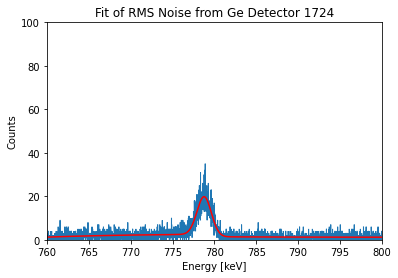

In [38]:
counts, bins, bars = plt.hist(energy, histtype='step', bins=300000)

lower = hA.find_nearest_bin(bins,760)
upper = hA.find_nearest_bin(bins,800)
ydata = counts[lower:upper]
xdata = bins[lower:upper]


    
#gmodel = Model(fM.linDubGaus)
gmodel = Model(fM.gePhotoPeak)
i = np.argmax(ydata)
print(xdata[i])
#params = gmodel.make_params(A=700, m1=315.5, s1=0.5, H_tail=-0.000001, H_step=1, tau=-0.5, slope=-6, intrcpt=180)
params = gmodel.make_params(A=60, mu=xdata[i], sigma=0.2, B=1.0, C=-1.0, D=0.5, delta=-1.0)
#params['s1'].vary = False
result = gmodel.fit(ydata,params, x=xdata)
print(result.fit_report())

sigma = result.params['sigma'].value
fw1 = 2.355*sigma
print(fw1)
err = result.params['sigma'].stderr
err1 = err*2.355
print(fw1)
print(err1)


plt.xlim(760, 800)
plt.ylim(0, 100)
plt.xlabel("Energy [keV]")
plt.ylabel("Counts")
plt.plot(xdata, result.best_fit, 'r-', label='best fit')
#plt.text(42,100, "FWHM = 0.0776(5) keV")
plt.title("Fit of RMS Noise from Ge Detector 1724")
plt.show()

2.0738973441399606
2.0738973441399606
0.024761361901091006


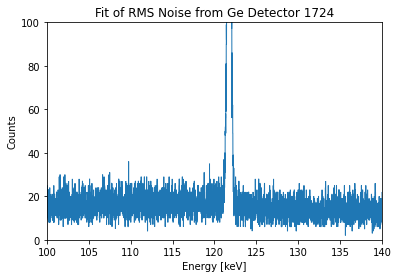

In [39]:
counts, bins, bars = plt.hist(energy, histtype='step', bins=300000)

lower = hA.find_nearest_bin(bins,760)
upper = hA.find_nearest_bin(bins,800)
ydata = counts[lower:upper]
xdata = bins[lower:upper]


    
#gmodel = Model(fM.linDubGaus)
gmodel = Model(fM.lingaus)
i = np.argmax(ydata)
params = gmodel.make_params(a1=200, m1=xdata[i], s1=0.1, slope=6, intrcpt=-180)
#params = gmodel.make_params(A=200, mu=xdata[i], sigma=0.2, B=-0.00001, C=0.001, D=0.5, delta=1.0)
#params['s1'].vary = False
result = gmodel.fit(ydata,params, x=xdata)
print(result)

sigma = result.params['s1'].value
fw1 = 2.355*sigma
print(fw1)
err = result.params['s1'].stderr
err1 = err*2.355
print(fw1)
print(err1)


plt.xlim(100, 140)
plt.ylim(0, 100)
plt.xlabel("Energy [keV]")
plt.ylabel("Counts")
plt.plot(xdata, result.best_fit, 'r-', label='best fit')
#plt.text(42,100, "FWHM = 0.0776(5) keV")
plt.title("Fit of RMS Noise from Ge Detector 1724")
plt.show()

In [20]:
df = fd.get_t2_data(1364, "Card1")

2636.0332


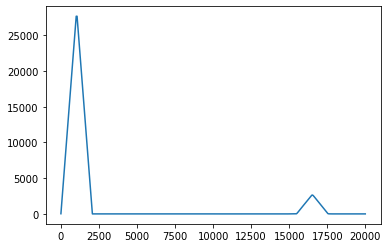

In [21]:
plt.plot(df[0]["wf_trap"]["values"].nda[0])
print(df[0]["trapEmax"].nda[0])